# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer
- Spambase
- Car evaluation
- Mushroom

For each of these a `.names` file is provided with details on the origin of data.

# Exercise 1: Breast Cancer



## 1.a: Load the Data
Use `pandas.read_csv` to load the data and assess the following:
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [1]:
import pandas as pd
import numpy as np
cancer = pd.read_csv('/home/useraj/Documents/exercise-book/notebooks/CSV/breast_cancer.csv', na_values='?')
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


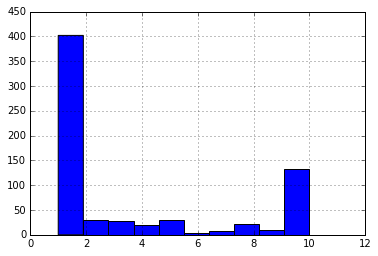

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
cancer['Bare_Nuclei'].hist()

In [3]:
cancer.ix[cancer['Bare_Nuclei'].isnull()]['Class'].value_counts()

2    14
4     2
Name: Class, dtype: int64

In [4]:
cancer.dropna(inplace=True)
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             683 non-null int64
Clump_Thickness                683 non-null int64
Uniformity_of_Cell_Size        683 non-null int64
Uniformity_of_Cell_Shape       683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [5]:
x_columns = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
X = cancer[x_columns]
y = cancer.Class == 4

## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

In [6]:
y.value_counts() / len(y)

False    0.650073
True     0.349927
Name: Class, dtype: float64

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

svm = SVC(kernel = 'linear')

def val_score(model, X, y, cv):
    print model
    score = cross_val_score(model, X, y, cv=cv)
    mean = score.mean()
    std = score.std()
    print "Score: {:.3} +/- {:.3}".format(mean, std)

val_score(svm, X, y, 3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Score: 0.965 +/- 0.0179


In [8]:
rbf = SVC(kernel = 'rbf')

val_score(rbf, X, y, 3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Score: 0.958 +/- 0.0251


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaled_svm = make_pipeline(StandardScaler(), svm)
val_score(scaled_svm, X, y, 3)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Score: 0.966 +/- 0.0161


In [10]:
scaled_rbf = make_pipeline(StandardScaler(), rbf)
val_score(scaled_rbf, X, y, 3)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Score: 0.968 +/- 0.018


In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
scaled_rbf.fit(X_train, y_train)
y_pred = scaled_rbf.predict(X_test)

names = ['Benign', 'Malignant']
cols = ['Pred_' + name for name in names]
cm = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(cm, columns=cols, index=names)

print confusion_df
print
print classification_report(y_test, y_pred)

           Pred_Benign  Pred_Malignant
Benign             142               5
Malignant            3              76

             precision    recall  f1-score   support

      False       0.98      0.97      0.97       147
       True       0.94      0.96      0.95        79

avg / total       0.96      0.96      0.96       226



/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Check:** Are there more false positives or false negatives? Is this good or bad?

**Answer:** There are more false positives. Depends on what point of view: The patient thinks they have cancer when they actually don't and the insurance has to pay for unnecessary treatment.

## 1.c: Feature Selection

Use any of the strategies offered by `sklearn` to select the most important features.

Repeat the cross validation with only those 5 features. Does the score change?

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, 5)
new_data = selector.fit_transform(X, y)
columns = X.columns[selector.get_support()]
new_X = X[columns]

X_train, X_test, y_train, y_test = train_test_split(new_X, y, stratify=y, test_size=0.33, random_state=42)

scaled_rbf.fit(X_train, y_train)
y_pred = scaled_rbf.predict(X_test)

names = ['Benign', 'Malignant']
cols = ['Pred_' + name for name in names]
cm = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(cm, columns=cols, index=names)
print confusion_df
print
print classification_report(y_test, y_pred)


           Pred_Benign  Pred_Malignant
Benign             142               5
Malignant            4              75

             precision    recall  f1-score   support

      False       0.97      0.97      0.97       147
       True       0.94      0.95      0.94        79

avg / total       0.96      0.96      0.96       226



## 1.d: Learning Curves

Learning curves are useful to study the behavior of training and test errors as a function of the number of datapoints available.

- Plot learning curves for train sizes between 10% and 100% (use StratifiedKFold with 5 folds as cross validation)
- What can you say about the dataset? do you need more data or do you need a better model?

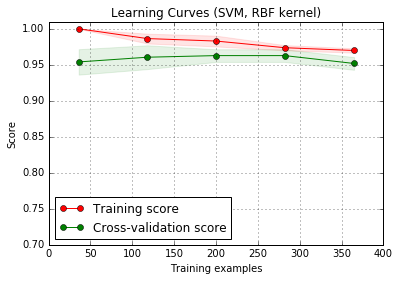

In [13]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt.show()

title = "Learning Curves (SVM, RBF kernel)"
cv = StratifiedKFold(n_splits=5)
estimator = scaled_rbf
plot_learning_curve(estimator, title, X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)


##  1.e: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [14]:
params = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
          'C': [0.5, 1, 4, 6]}

from sklearn.model_selection import GridSearchCV
searcher = GridSearchCV(rbf, params, cv=5)
searcher.fit(X, y)
print searcher.best_params_
print searcher.best_score_


{'kernel': 'linear', 'C': 0.5}
0.966325036603


# Exercise 2
Now that you've completed steps 1.a through 1.e it's time to tackle some harder datasets. But before we do that, let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

In [15]:
def do_cv(model, X, y, cv):
    score = cross_val_score(model, X, y, cv=cv)
    print model
    mean = score.mean()
    std = score.std()
    print "Score: {:.3} +/- {:.3}".format(mean, std)
    

## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes

In [16]:
def do_cm_cr(model, X, y, names):
    train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    columns = ['Pred_{}'.format(i) for i in names]
    index = ['Actual_{}'.format(i) for i in names]
    print pd.DataFrame(confusion_matrix(test_y, pred_y), columns=columns, index=index)
    print classification_report(test_y, pred_y)
    return train_X, test_X, train_y, test_y

## 2.c: Learning Curves
Implement a function `do_learning_curve(model, X, y, sizes)` that automates drawing the learning curves:
- Allow for sizes input
- Use 5-fold StratifiedKFold cross validation

*See above*

## 2.d: Grid Search
Implement a function `do_grid_search(model, parameters)` that automates the grid search by doing:
- Calculate grid search
- Print best parameters
- Print best score
- Return best estimator


In [17]:
def do_grid_search(model, parameters, X, y):
    grid = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
    grid.fit(X, y)
    print grid.best_params_
    print grid.best_score_
    return grid.best_estimator_

# Exercise 3
Using the functions above, analyze the Spambase dataset.

Notice that now you have many more features. Focus your attention on step C => feature selection

- Load the data and get to X, y
- Select the 15 best features
- Perform grid search to determine best model
- Display learning curves

In [18]:
spam = pd.read_csv('../CSV/spambase.csv')
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [19]:
X = spam.drop('class', axis=1)
y = spam['class']
selector = SelectKBest(chi2, 15)
new_data = selector.fit_transform(X, y)
columns = X.columns[selector.get_support()]
new_X = X[columns]

In [ ]:
svc = SVC()
params = {'kernel': ['linear', 'rbf', 'poly'],
          'C': [0.5, 1, 4, 6]}
bestsvc = do_grid_search(svc, params, new_X, y)

In [ ]:
train_X, test_X, train_y, test_y = do_cm_cr(bestsvc, new_X, y, names)

In [ ]:
title = "Learning Curves (SVM, RBF kernel)"
cv = StratifiedKFold(n_splits=5)
estimator = bestsvc
plot_learning_curve(estimator, title, X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)

# Exercise 4
Repeat steps 1.a - 1.e for the car dataset. Notice that now features are categorical, not numerical.
- Find a suitable way to encode them
- How does this change our modeling strategy?

Also notice that the target variable `acceptability` has 4 classes. How do we encode them?


In [ ]:
car = pd.read_csv('CSV/car.csv')


# Bonus
Repeat steps 1.a - 1.e for the mushroom dataset. Notice that now features are categorical, not numerical. This dataset is quite large.
- How does this change our modeling strategy?
- Can we use feature selection to improve this?


In [ ]:
mushroom = pd.read_csv('CSV/mushroom.csv')